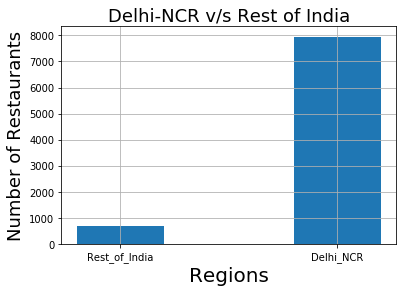

Rest_of_India 705
Delhi_NCR 7947


In [1]:
# Q1
# 1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
# Data set Used is Zomato.csv
zomato = pd.read_csv("Downloads/zomato.csv", encoding="latin-1")
# Filtering Data Country Code of India  = 1
zomato_india = zomato[zomato["Country Code"] == 1]
# Further Filtering Data with Cities of Delhi NCR which include New Delhi, Ghaziabad , Noida , Gurgaon , Faridabad.
zomato_NCR = zomato_india[(zomato_india["City"] == "New Delhi") | (zomato_india["City"] == "Ghaziabad") |
                          (zomato_india["City"] == "Noida") | (zomato_india["City"] == "Gurgaon")| 
                          (zomato_india["City"] == "Faridabad")]
# Finding Data for Cities other than Delhi NCR
zomato_ROI = zomato_india[zomato_india.City.isin(zomato_NCR.City) == False]
# Using Value_counts() function finding the number of Restaurants in different Regions Namely : Delhi NCR and Rest of India
num_of_restaurant = [sum(zomato_ROI["Restaurant Name"].value_counts().values), sum(zomato_NCR["Restaurant Name"].value_counts().values)]
region = ["Rest_of_India","Delhi_NCR"]
# the Plot is a Bar Plot
plt.bar(region,num_of_restaurant,width = 0.4)
plt.xlabel("Regions",size = 20)
plt.title("Delhi-NCR v/s Rest of India",size = 18)
plt.ylabel("Number of Restaurants",size = 18)
plt.grid()
plt.show()
# the graph Shows that the data is highly skewed toward the cities included in Delhi-NCR. with Delhi NCR being with close to 
# 8000 restaurants and Rest of india <1000.
for i in range(2):
    print(region[i],num_of_restaurant[i])

In [3]:
# Q1
# 2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.
#Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
###################################
# Data used is same as above 
# using Dictionary finding all the cuisines present in the Delhi NCR region. 
# used Split function for restaurants with more than one cuisines.
# futher strip function is an important step to remove all the extra space in front of Cuisines(Names).
a = {}
for i in zomato_NCR.Cuisines:
    for j in i.split(","):
        if j.strip() in a:
            a[j.strip()] +=  1
        else:
            a[j.strip()] =  1 
# similar steps followed for Rest of India also
s = {}
for i in zomato_ROI.Cuisines:
    for j in i.split(","):
        if j.strip() in s:
            s[j.strip()] += 1
        else:
            s[j.strip()] = 1
# using sets funtions finding A - B . used set because it becomes very easy to directly subtract two datasets.
print("Cuisines present in Rest of India Not in Delhi NCR",set(s) - set(a),"Zomato.csv")
####################################
# part 2 of this question was to check the mismatch between the datasets used.
# for this API get request was made to the desired URL.
import requests
import json
header = {"Accept": "application/json", "user_key": "4ed28fef80b5487abd37dba95a34b7d4"}
response = requests.get("https://developers.zomato.com/api/v2.1/cuisines",headers = header,params = {"city_id": 1})
data = response.json()
f = []
for i in data["cuisines"]:
    f.append(i["cuisine"]["cuisine_name"])
# this Subtraction shows the difference between the datasets as the answer is different.
# the answer printed shows that the site data set included BBQ and Malwani 
# it also shows the the dataset zomato.csv includes data not included in the API, example Indian and Charcoal Grill.
print("Cuisines present in Rest of India Not in Delhi NCR",set(s) - set(f),"API")
# thus we see a clear mismatch between the datasets.

Cuisines present in Rest of India Not in Delhi NCR {'Malwani', 'Cajun', 'BBQ', 'German'} Zomato.csv
Cuisines present in Rest of India Not in Delhi NCR {'German', 'Indian', 'Cajun', 'Charcoal Grill'} API


('North Indian', 3597)
('Chinese', 2448)
('Fast Food', 1866)
('Mughlai', 933)
('Bakery', 697)
('South Indian', 569)
('Continental', 547)
('Desserts', 542)
('Street Food', 538)
('Italian', 535)



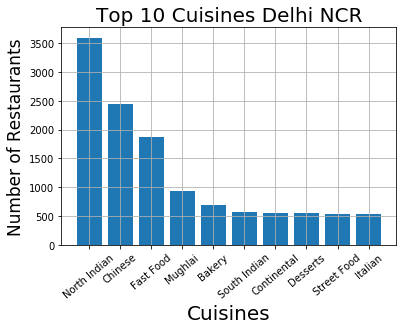

('North Indian', 349)
('Chinese', 242)
('Continental', 177)
('Italian', 147)
('Cafe', 136)
('Fast Food', 97)
('South Indian', 62)
('Mughlai', 59)
('Desserts', 55)
('Mexican', 50)


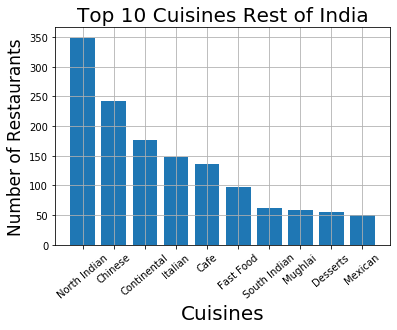

In [22]:
# Q1
# 3.Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
# Dataset used is same as above. 
##############################
# the Dictionary made in Part 2 of Question 1 comes to work.
# Dictionary "a" is Dictionary for Delhi NCR.
# lists are made to add top 10 Cuisines Present in Delhi NCR.
f = []
g = []
d = sorted(a.items(),key=lambda x: x[1],reverse=True)
for i in range(10):
    print(d[i])
    f.append(d[i][0])
    g.append(d[i][1])
# Bar plot is made for the Top 10 Cuisines present in Delhi NCR.
plt.bar(f,g)
plt.xticks(rotation = 40)
plt.xlabel("Cuisines",size = 20)
plt.title("Top 10 Cuisines Delhi NCR",size = 20)
plt.ylabel("Number of Restaurants",size = 17)
plt.grid()
plt.show()
# similar steps are followed for Rest of India.
h = []
k = []
e = sorted(s.items(),key=lambda x: x[1],reverse=True)
for i in range(10):
    print(e[i])
    h.append(e[i][0])
    k.append(e[i][1])
plt.bar(h,k)
plt.xticks(rotation = 40)
plt.xlabel("Cuisines",size = 20)
plt.title("Top 10 Cuisines Rest of India",size = 20)
plt.ylabel("Number of Restaurants",size = 17)
plt.grid()
plt.show()
# the plots show that North Indian is the most preffered Cuisine no matter what the region is.
# Moreover chinese is also 2nd most preffered no matter what the region be.
# other common Cuisines are : Fast Food, Mughlai ,South Indian,Continental,Desserts,Italian.
# the study shows that overall people independent of their region have similar tastes.

('North Indian', 3597)
('Chinese', 2448)
('Fast Food', 1866)
('Mughlai', 933)
('Bakery', 697)
('South Indian', 569)
('Continental', 547)
('Desserts', 542)
('Street Food', 538)
('Italian', 535)


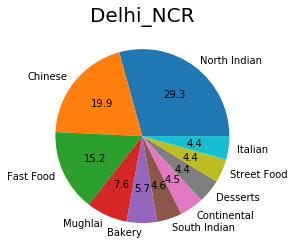

('North Indian', 349)
('Chinese', 242)
('Continental', 177)
('Italian', 147)
('Cafe', 136)
('Fast Food', 97)
('South Indian', 62)
('Mughlai', 59)
('Desserts', 55)
('Mexican', 50)


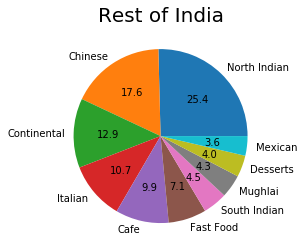

In [58]:
# Q1 
# 4.Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India.
#Plot the suitable graph to explain your inference.
# Dataset used is same as above. 
##############################
# lists are made to add top 15 Cuisines Present in Delhi NCR.
f = []
g = []
d = sorted(a.items(),key=lambda x: x[1],reverse=True)
for i in range(10):
    print(d[i])
    f.append(d[i][0])
    g.append(d[i][1])
# pie Plot is made for the Top 10 Cuisines present in Delhi NCR.
plt.pie(g,labels = f,autopct = "%.1f")
plt.title("Delhi_NCR",size = 20)
plt.show()
# similar steps are followed for Rest of India.
h = []
k = []
e = sorted(s.items(),key=lambda x: x[1],reverse=True)
for i in range(10):
    print(e[i])
    h.append(e[i][0])
    k.append(e[i][1])
plt.pie(k,labels = h,autopct = "%.1f")
plt.title("Rest of India",size = 20)
plt.show()
# the plots below are taken for are used to draw inference.
# the plots at first glance look similar due to North indian and Chinese.
# but the case is not very similar for the rest of the cuisines,
# Delhi NCR region people have a very high interest for Fast Food but that is Double of what is present in Rest of India.
# Italian for that matter is close to three times more liked. 
# Continental for example is very highly liked by people in Rest of India but is at a very low % in Delhi NCR
# Cafe for example is close to 10% in Rest of India but it is not even present in Delhi NCR
# this shows that even though the likings seem to be same at first glance their is a lot of differences.


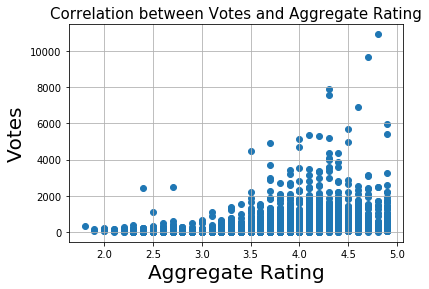

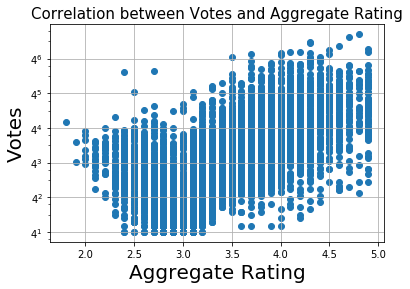

In [15]:
#Q2
# part 1
# 1.Write a short detail analysis of how the rating is affected by restaurant due to Number of Votes given Restaurant
#Plot a suitable graph to explain your inference.
# copy of the data is made 
zomato_correlation = zomato.copy()
# to see the most accurate results data must be filtered of all None items so that the results are not misleading.
zomato_correlation.drop(zomato_correlation[zomato_correlation["Rating text"] == "Not rated"].index,inplace = True)
# the relationship to be developed is of Votes and Aggregate Rating.
y = zomato_correlation["Votes"]
x = zomato_correlation["Aggregate rating"]
# Scatter plots are considered to be the best when performing correlation analysis. 
plt.scatter(x,y)
plt.xlabel("Aggregate Rating",size = 20)
plt.ylabel("Votes",size = 20)
plt.grid()
plt.title("Correlation between Votes and Aggregate Rating",size = 15)
plt.show()
# the second plot is made taking log scale at the y axis so that the values seem to be much more clear.
plt.scatter(x,y)
plt.xlabel("Aggregate Rating",size = 20)
plt.ylabel("Votes",size = 20)
plt.grid()
# log scale is taken so that the values are seen much more clearly.
plt.yscale('log',basey = 4)
plt.title("Correlation between Votes and Aggregate Rating",size = 15)
plt.show()
# ths plot shows a positive correlation of values.
# more the Number of Votes higher is the Probability of having a higher rating of yur Restaurant
# the point to notice is all restaurants with more than than 6000 Votes have a rating of 4+ 
# the upward direction of the plot is much more clear in the 2nd plot.
# 2nd plot clearly shows more the votes higher is Aggregate Rating

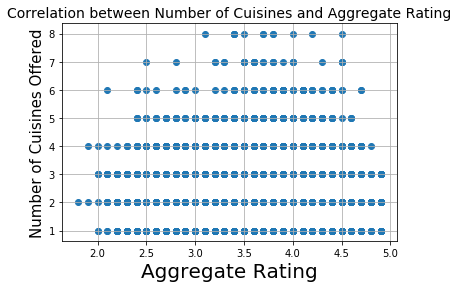

In [59]:
# Q2
#part 1
#2.Write a short detail analysis of how the rating is affected by restaurant due Restaurant serving more number of cuisines.
#Plot a suitable graph to explain your inference.
# copy of the data is made.
zomato_R = zomato.copy()
# to see the most accurate results data must be filtered of all None items so that the results are not misleading.
zomato_R.dropna(subset = ["Cuisines"],inplace = True)
zomato_R.drop(zomato_R[zomato_R["Rating text"] == "Not rated"].index,inplace = True)
# the method used here is spliting the number of cuisines and then taking the lenght of the the list.
j = []
for i in zomato_R["Cuisines"]:
    j.append(len(i.split(",")))
f = zomato_R["Aggregate rating"]
# Scatter plots are considered to be the best when performing correlation analysis. 
plt.scatter(f,j)
plt.xlabel("Aggregate Rating",size = 20)
plt.ylabel("Number of Cuisines Offered",size = 15)
plt.title("Correlation between Number of Cuisines and Aggregate Rating",size = 14)
plt.grid()
plt.show()
# the plot shows that lower the number of cuisines offered the higher is the chance of getting a better rating.
# this can also be said as being specilised id making a particular cuisine rather than being bad at all.
# seeing the plot it shows the Restaurants proucing 7 or more cuisines never crossed 4.5.
# also the ke thing to notice is their are higher number of reataurants with less cuisines.
# the above fact is clarified with the number of ratings given to restaurants.
# the plot shows that a Restaurant should focus its resources to a limited number of cuisines.

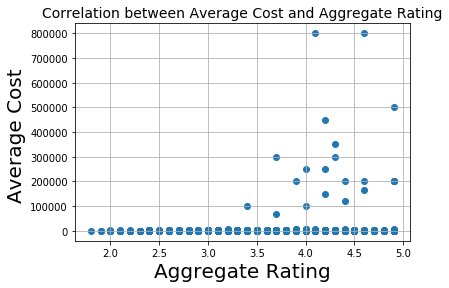

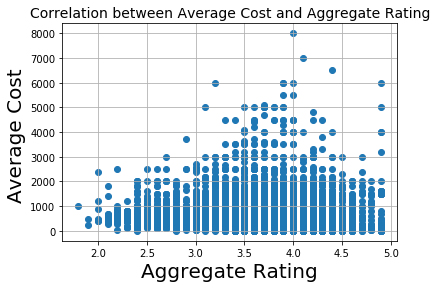

In [60]:
# Q2
#part 1
#3.Write a short detail analysis of how the rating is affected by restaurant due to Average Cost of Restaurant
#Plot a suitable graph to explain your inference.
# copy of the Data is made
zomato_Cost = zomato.copy()
# to see the most accurate results data must be filtered of all None items so that the results are not misleading.
zomato_Cost.drop(zomato_Cost[zomato_Cost["Rating text"] == "Not rated"].index,inplace = True)
# the analysis was strightforward and f is the Aggregate rating column od the data. and g being Average Cost for two.
f = zomato_Cost["Aggregate rating"]
g = zomato_Cost["Average Cost for two"]
# Scatter plots are considered to be the best when performing correlation analysis. 
plt.scatter(f,g)
plt.xlabel("Aggregate Rating",size = 20)
plt.ylabel("Average Cost ",size = 20)
plt.title("Correlation between Average Cost and Aggregate Rating",size = 14)
plt.grid()
plt.show()
# the scatter plot very clearly shows that higher the Average Cost for two higher is Aggregate rating.
# the fact no notice is that the higher cost Restaurants ted to be rated less .
# one reasoncan be due to it being very costly and very few people can afford such Restaurants.
zomato_Cost_1 = zomato_Cost.drop(zomato_Cost[zomato_Cost["Average Cost for two"] > 60000].index)
h = zomato_Cost_1["Aggregate rating"]
i = zomato_Cost_1["Average Cost for two"]
# Scatter plots are considered to be the best when performing correlation analysis. 
plt.scatter(h,i)
plt.xlabel("Aggregate Rating",size = 20)
plt.ylabel("Average Cost ",size = 20)
plt.title("Correlation between Average Cost and Aggregate Rating",size = 14)
plt.grid()
plt.show()
# the second Graph was necessary for assessment as removing the outliners is very crucial.
# But the outcome of the graph is the very similar
# higher the Average Cost higher is Aggregate Rating

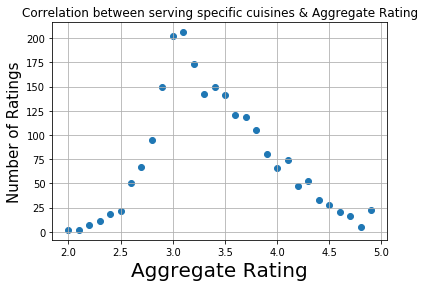

In [53]:
# Q2
#part 1
#4.Write a short detail analysis of how the rating is affected by restaurant due to Restaurant serving some specific cuisines.
#Plot a suitable graph to explain your inference.
# copy of the Data is made
zomato_c = zomato.copy()
# to see the most accurate results data must be filtered of all None items so that the results are not misleading.
zomato_c.drop(zomato_c[zomato_c["Rating text"] == "Not rated"].index,inplace = True)
zomato_c.dropna(subset = ["Cuisines"],inplace = True)
# the method used here if only one cuisine serverd by the restaurant only then add to the dictionary.
k = {}
for i in zomato_c.index:
    if "," not in (zomato_c["Cuisines"][i]):
        if (zomato_c["Aggregate rating"][i]) in k:
            k[zomato_c["Aggregate rating"][i]] += 1
        else:
            k[zomato_c["Aggregate rating"][i]] = 1
# Scatter plots are considered to be the best when performing correlation analysis. 
plt.scatter(k.keys(),k.values())
plt.grid()
plt.xlabel("Aggregate Rating",size = 20)
plt.ylabel("Number of Ratings",size = 15)
plt.title("Correlation between serving specific cuisines & Aggregate Rating")
plt.show()
# this plot is very clear with not many points and this being very specific to the values.
# the notes the number of ratings to 0.1 accuracy.
# the plot shows that serving one cuisine only doesnot mean to be specialised and have very good ratings.
# the plot shows a very unusual curve not very much can be understood with just this graph.
# thus we can conclude that Restaurant serving some specific cuisines doesnot have a uniform affect on the ratings.

In [55]:
# Q2
# part  2
#Find the weighted restaurant rating of each locality .
#find out the top 10 localities with more weighted restaurant rating.
# Weighted Restaurant Rating= Σ (number of votes * rating) / Σ (number of votes)
# copy of the Data is made
zomato_r = zomato.copy()
cities = zomato_r["City"].value_counts()
# A Dictionary is made and with a simple approach and using the formula writtern above the result is found
weighted_rating = {}
# weighted_rating is found using the formula given above.
for i in cities.index:
    zomato_city = zomato_r[zomato_r["City"] == i]
    weighted_rating[i] = (sum(zomato_city["Aggregate rating"]*zomato_city["Votes"])/sum(zomato_city["Votes"]))
# the function sorted used to sort values to print the top 10 cites.
zomato_cities = sorted(weighted_rating.items(),key = lambda x : x[1],reverse = True) 
zomato_top_city = zomato_cities[:10]
print("Top 10 Cities")
for i in zomato_top_city:
    print(i)

Top 10 Cities
('Inner City', 4.9)
('Tangerang', 4.821419518377693)
('Quezon City', 4.8)
('Pasig City', 4.7111004784689)
('Mandaluyong City', 4.628416666666667)
('Rio de Janeiro', 4.620448877805486)
('Makati City', 4.604088397790055)
('Beechworth', 4.6)
('London', 4.563984410820725)
('Secunderabad', 4.548054679284963)


Top 15 Restaurants
Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Pizza Hut 30
Giani 29
Baskin Robbins 28
Barbeque Nation 26
Dunkin' Donuts 22
Giani's 22
Barista 22
Pind Balluchi 20
Costa Coffee 20


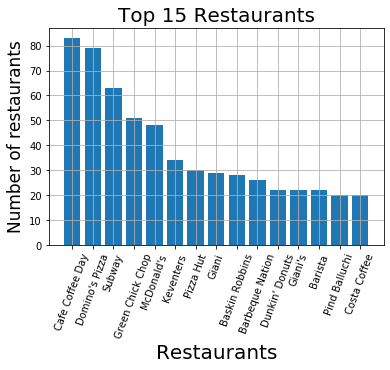

In [61]:
#Q3 Visualization
# part 1
# Plot the bar graph top 15 restaurants have a maximum number of outlets.
# the data zomato is directly used from the first question.
Restaurants_top = zomato["Restaurant Name"].value_counts()[:15]
a = []
b = []
print("Top 15 Restaurants")
for i in  range(len(Restaurants_top)):
    print(Restaurants_top.index[i],Restaurants_top.values[i])
    a.append(Restaurants_top.index[i])
    b.append(Restaurants_top.values[i])
# bar plot is used.
plt.bar(a,b)
plt.xticks(rotation = 70)
plt.grid()
plt.xlabel("Restaurants",size = 20)
plt.ylabel("Number of restaurants",size = 17)
plt.title("Top 15 Restaurants",size = 20)
plt.show()
# the plot Shows that Cafe Coffee Day has the highest number of outlets around the world.

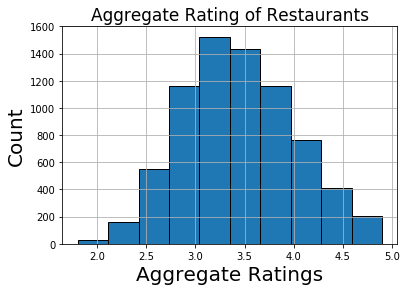

In [24]:
#Q3 Visualization
# Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant)
# copy of the Data is made
zomato_ratings = zomato.copy()
# to see the most accurate results data must be filtered of all None items so that the results are not misleading.
zomato_ratings.drop(zomato_ratings[zomato_ratings["Rating text"] == "Not rated"].index,inplace = True)
# histogrm is used
plt.hist(zomato_ratings["Aggregate rating"],edgecolor = "black")
plt.xlabel("Aggregate Ratings",size = 20)
plt.ylabel("Count",size = 20)
plt.title("Aggregate Rating of Restaurants",size = 17)
plt.grid()
plt.show()
# the result is same as seen in Question Q2 part 4.

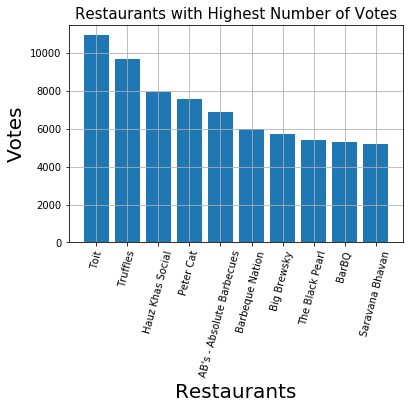

In [82]:
#Q3 Visualization
#Plot the bar graph top 10 restaurants in the data with the highest number of votes
# copy of the Data is made
zomato_votes = zomato.copy()
# to see the most accurate results data must be filtered of all None items so that the results are not misleading.
zomato_votes.sort_values(by = ["Votes"],inplace = True,ascending= False)
# here the thing to note is that 11 is used inplace of 10
zomato_votes = zomato_votes[:11]
zomato_votes["Restaurant Name"]
zomato_votes["Votes"]
# bar plot is used 
plt.bar(zomato_votes["Restaurant Name"],zomato_votes["Votes"])
plt.xticks(rotation = 75)
plt.grid()
plt.xlabel("Restaurants",size = 20)
plt.ylabel("Votes",size = 20)
plt.title("Restaurants with Highest Number of Votes",size = 15)
plt.show()
# why 11? because AB's - Absolut Barbecues appears twice and one is removed automatically by pyplot.

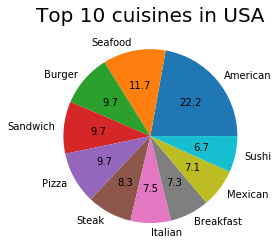

In [33]:
#Q3 Visualization
# Plot the pie graph of top 10 cuisines present in restaurants in the USA.
# copy of the Data is made
zomato_usa = zomato.copy()
# the code for USA is 216
zomato_usa = zomato_usa[zomato_usa["Country Code"] == 216]
cuisines = {}
# to see the most accurate results data must be filtered of all None items so that the results are not misleading.
zomato_usa.dropna(subset = ["Cuisines"],inplace = True)
# used Split function for restaurants with more than one cuisines.
# futher strip function is an important step to remove all the extra space in front of Cuisines(Names).
for i in zomato_usa["Cuisines"].values:
    c = i.split(",")
    for j in c:
        if j.strip() in cuisines:
            cuisines[j.strip()] += 1
        else:
            cuisines[j.strip()] = 1
# the function sorted used to sort values to print the top 10 cuisines.
cuisines = sorted(cuisines.items(),key=lambda x: x[1],reverse=True)
cuisines_top_10 = cuisines[:10]
values = []
cuisines_names = []
for i in cuisines_top_10:
    values.append(i[1])
    cuisines_names.append(i[0])
# pie plot is used 
plt.pie(values,labels = cuisines_names,autopct = "%.1f")
plt.title("Top 10 cuisines in USA",size = 20)
plt.show()

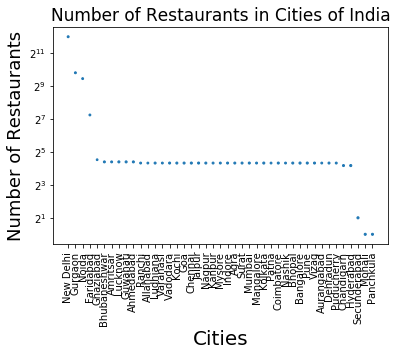

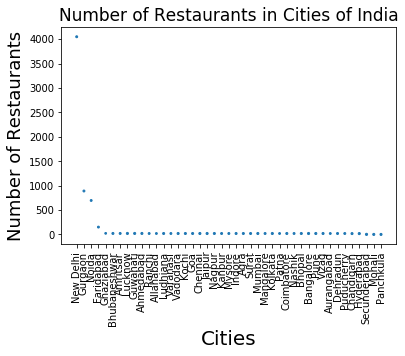

In [89]:
#Q3 Visualization
#Plot the bubble graph of a number of Restaurants present in the city of India 
#and keeping the weighted restaurant rating of the city in a bubble
# copy of the Data is made
zomato_india = zomato.copy()
# country code of India is 1
zomato_india = zomato_india[zomato_india["Country Code"] == 1]
# to see the most accurate results data must be filtered of all None items so that the results are not misleading.
zomato_india.drop(zomato_india[zomato_india["Rating text"] == "Not rated"].index,inplace = True)
cities = zomato_india["City"].value_counts()
weighted_rating = []
# Weighted Restaurant Rating= Σ (number of votes * rating) / Σ (number of votes)
for i in cities.index:
    zomato_india_city = zomato_india[zomato_india["City"] == i]
    weighted_rating_city = sum(zomato_india_city["Aggregate rating"]*zomato_india_city["Votes"])/sum(zomato_india_city["Votes"])
    weighted_rating.append(weighted_rating_city)
plt.scatter(cities.index,cities.values, s = weighted_rating)
plt.xticks(rotation = 90)
plt.xlabel("Cities",size =  20)
plt.ylabel("Number of Restaurants",size =  18)
plt.yscale('log',basey = 2)
plt.title("Number of Restaurants in Cities of India",size = 17)
plt.show()
# the thing to note is log scale is used because the values seem much more clear . 
# and the fifference between values is much clearer.
plt.scatter(cities.index,cities.values, s = weighted_rating)
plt.xticks(rotation = 90)
plt.xlabel("Cities",size =  20)
plt.ylabel("Number of Restaurants",size =  18)
plt.title("Number of Restaurants in Cities of India",size = 17)
plt.show()
# graph 2 . shows if log scale is not used.
# the graph seems lifeless.
###############
# the bubbles cannot be differentiated due to the simple reason that the ap between  is very less 
# for example to human eye 3.7 and 4.3 is almost the same.
# but code clearyly shows the use of bubble size.